### Understanding and dissecting Chowdhary and Assisi, 2019

#### To-do list

1. Two reciprocally coupled **excitatory** oscillators
	- (to observe synchrony)
2. Two reciprocally coupled **inhibitory** oscillators
	- (to observe asynchrony)
3. Bipartite networks
	1. No within-group connections
	2. Complementary edges are excitatory connections
	3. Ratio of cumulative strength of excitation/inhibition is varied
4. Balanced sudoku network

#### Imports

In [98]:
from brian2 import *

In [99]:
%matplotlib inline

#### Two reciprocally coupled excitatory oscillators

In [124]:
tau = 4*ms
timeperiod = 5*ms
tp = timeperiod
I = 1.1/ms
gamma = 1/ms

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) but with t replaced by (phi*tau/gamma) [para equation]
# converted to D.E. by differentiation
# dv/dt = (I/gamma) - v is the actual equation, but tau is introduced to keep the equation dimensionally consistent.
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''


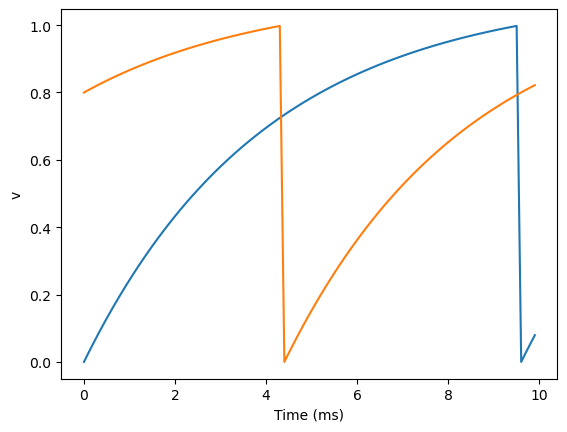

In [125]:
# Sample first spikes

start_scope()

G1 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')

G2.v = [0.8]

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)

run(10*ms)

plot(M1.t/ms, M1.v[0], label='Neuron 1')
plot(M2.t/ms, M2.v[0], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v');

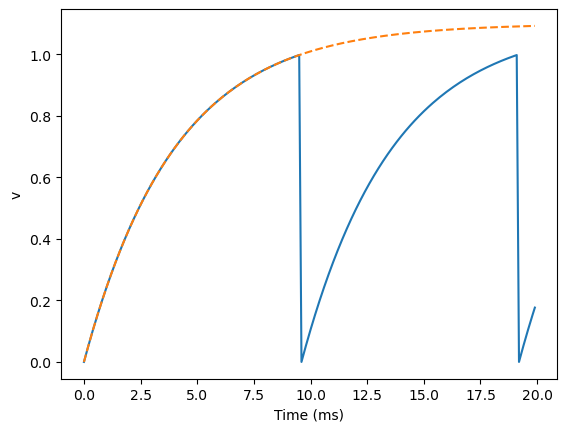

In [126]:
# plot(M1.t/ms, I/gamma(1-exp(-M1.t/tau)), 'C1--',label='Analytic')
# Sample first spikes

start_scope()

G1 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')

M1 = StateMonitor(G1, 'v', record=True)

run(20*ms)

# solution to du/dt = (I/gamma - U)/tau is:
# I/gamma * (1 - exp(-t/tau))

plot(M1.t/ms, M1.v[0], label='Neuron 1')
plot(M1.t/ms, (I/gamma)*(1-exp(-M1.t/tau)), 'C1--',label='Analytic')
xlabel('Time (ms)')
ylabel('v');

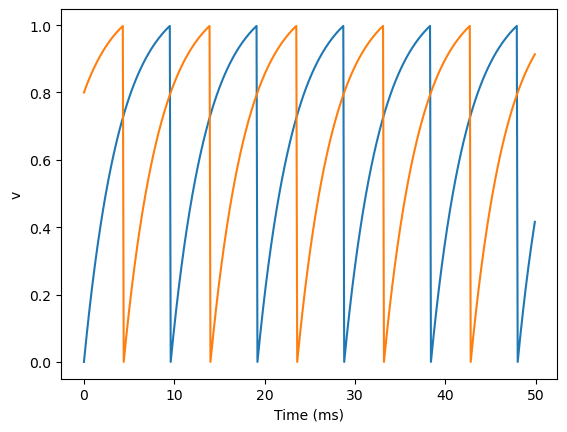

In [101]:
# Unconnected

start_scope()

G1 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')

G2.v = [0.8]

# S1 = Synapses(G1, G2, on_pre='v_post += 0.2')
# S2 = Synapses(G2, G1, on_pre='v_post += 0.2')

# S1.connect()
# S2.connect()

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(50*ms)

plot(M1.t/ms, M1.v[0], label='Neuron 1')
plot(M2.t/ms, M2.v[0], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v');

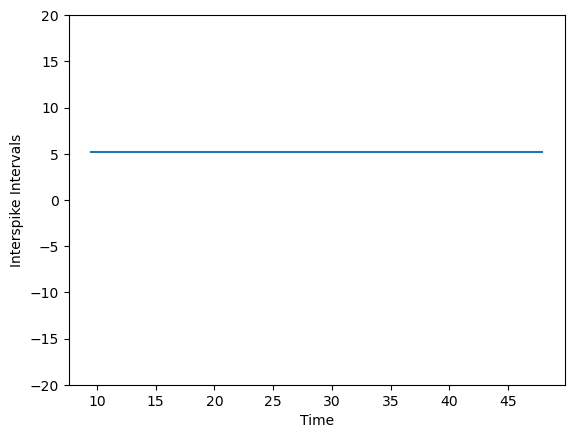

In [102]:
# Plotting phase separation between the two neurons over time

spikes = min(len(Sp2.t[:]), len(Sp1.t[:]))
Vals = Sp1.t[:spikes] - Sp2.t[:spikes]

plot(Sp1.t/ms, Vals/ms)
xlabel('Time')
ylabel('Interspike Intervals')
ylim(-20, 20);

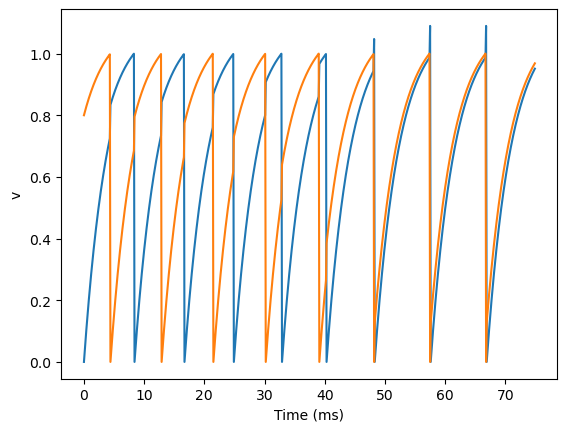

In [103]:
# Now with excitatory connections

start_scope()

G1 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0', method='exact')

G2.v = [0.8]

S1 = Synapses(G1, G2, on_pre='v_post += 0.1')
S2 = Synapses(G2, G1, on_pre='v_post += 0.1')

S1.connect()
S2.connect()

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(75*ms)

plot(M1.t/ms, M1.v[0], label='Neuron 1')
plot(M2.t/ms, M2.v[0], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v');

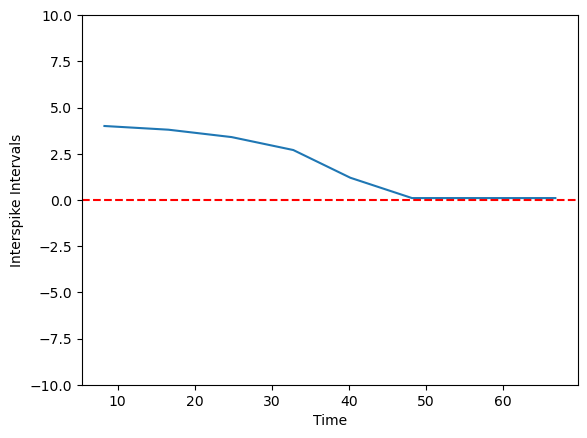

In [104]:
# plotting separations again

spikes = min(len(Sp2.t[:]), len(Sp1.t[:]))
Vals = Sp1.t[:spikes] - Sp2.t[:spikes]

plot(Sp1.t/ms, Vals/ms)
plt.axhline(y = 0, color = 'r', linestyle = '--')
xlabel('Time')
ylabel('Interspike Intervals')
ylim(-10, 10);